# How to classify MNIST digits with different neural network architectures
### Getting started with neural networks and Keras
(https://medium.com/tebs-lab/how-to-classify-mnist-digits-with-different-neural-network-architectures-39c75a0f03e3)

Terms:
- The name x refers to input data, while the name y refers to the labels. ŷ (pronounced y-hat) refers to the predictions made by a model.
- Training data is the data our model learns from.
- Test data is kept secret from the model until after it has been trained. Test data is used to evaluate our model.
- A loss function is a function to quantify how accurate a model’s predictions were.
- An optimization algorithm controls exactly how the weights of the computational graph are adjusted during training

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnistnpz/mnist.npz


In [2]:
def load_data(path):
    with np.load(path) as f:
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']
        return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_data('../input/mnistnpz/mnist.npz')


In [3]:
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)


- Create a vector as long as the number of categories we have, and force the model to set exactly one of the positions in the vector to 1 and the rest to 0 (the single 1 is the “hot” value within the vector).

In [4]:
import keras
# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])


First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


### Neural network architectures
1. How many layers are there?
2. How many nodes are there in each of those layers?
3. What transfer/activation function is used at each of those layers?

- Use the sigmoid transfer function for all of the hidden layers
- Common loss function called categorical cross entropy.
- Simplest optimization algorithms: Stochastic Gradient Descent (SGD).

In [5]:
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/

image_size = 784 # 28*28
num_classes = 10 # ten unique digits

model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


### Building the network
- All the networks in this article will have the same input layer and output layer. We defined the input layer earlier as a vector with 784 entries — this is the data from the flattened 28x28 image. The output layer was also implicitly defined earlier when we created a one-hot encoded vector from the labels — the ten labels correspond to the ten nodes in this layer.
- Our output layer also uses a special activation function called softmax. This normalizes the values from the ten output nodes such that:
    - all the values are between 0 and 1, and
    - the sum of all ten values is 1.
    
- Finally, this model has a single hidden layer with 32 nodes using the sigmoid activation function. The resulting architecture has 25,450 tunable parameters. From the input layer to the hidden layer there are 784*32 = 25,088 weights. The hidden layer has 32 nodes so there are 32 biases. This brings us to 25,088 + 32 = 25,120 parameters.
    - From the hidden layer to the output layer there are 32*10 = 320 weights.
    - Each of the ten nodes adds a single bias bringing us to 25,120 + 320 + 10 = 25,450 total parameters.

#### Train and evaluate model

Epoch 1/15
422/422 [==============================] - 2s 3ms/step - loss: 1.4544 - accuracy: 0.5719 - val_loss: 0.5183 - val_accuracy: 0.8840
Epoch 2/15
422/422 [==============================] - 1s 2ms/step - loss: 0.5491 - accuracy: 0.8604 - val_loss: 0.3804 - val_accuracy: 0.9047
Epoch 3/15
422/422 [==============================] - 1s 2ms/step - loss: 0.4330 - accuracy: 0.8810 - val_loss: 0.3585 - val_accuracy: 0.9053
Epoch 4/15
422/422 [==============================] - 1s 3ms/step - loss: 0.3892 - accuracy: 0.8864 - val_loss: 0.3126 - val_accuracy: 0.9122
Epoch 5/15
422/422 [==============================] - 1s 2ms/step - loss: 0.3666 - accuracy: 0.8938 - val_loss: 0.3015 - val_accuracy: 0.9133
Epoch 6/15
422/422 [==============================] - 1s 2ms/step - loss: 0.3512 - accuracy: 0.8950 - val_loss: 0.3063 - val_accuracy: 0.9118
Epoch 7/15
422/422 [==============================] - 1s 2ms/step - loss: 0.3609 - accuracy: 0.8933 - val_loss: 0.2897 - val_accuracy: 0.9165
Epoch 

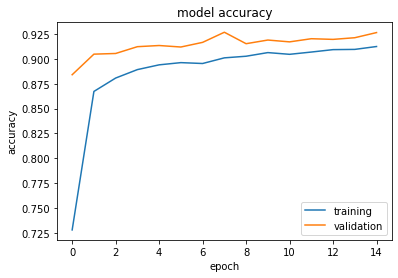

In [6]:
batch_size = 128
epochs = 15
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
#loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()


#print('Test loss:', score[0]) 
#print('Test accuracy:', score[1])

In [7]:
def create_dense(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(image_size,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'sigmoid'))

    model.add(Dense(units=num_classes, activation='softmax'))
    return model

def evaluate(model, batch_size=128, epochs=5):
    model.summary()
    batch_size = 128
    epochs = 15
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
   # print(f'Test loss: {loss:.3}')
   # print(f'Test accuracy: {accuracy:.3}')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
422/422 [==============================] - 1s 3ms/step - loss: 1.4756 - accuracy: 0.5753 - val_loss: 0.5525 - val_accuracy: 0.8837
Epoch 2/15
422/422 [==============================] - 1s 2ms/step - loss: 0.5714 - accuracy: 0.8572 - val_loss: 0.3985 - val_accuracy: 0.8982
Epoch 3/15
422/422 [==============================] - 1s 2ms/step - loss: 0.4360 - accuracy: 0.8799 - val_loss: 0.3360 - val_accuracy: 0.9118
Epoch 4/15
422/422 [==============================] - 1s 2ms/step - loss: 0.3962 - acc

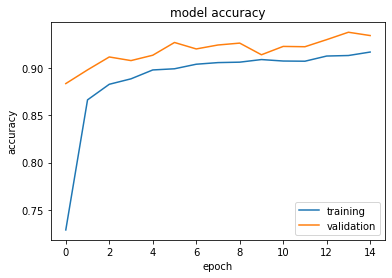


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
422/422 [==============================] - 2s 3ms/step - loss: 1.8296 - accuracy: 0.4786 - val_loss: 0.7685 - val_accuracy: 0.8452
Epoch 2/15
422/422 [==============================] - 1s 2ms/step - loss: 0.7112 - accuracy: 0.8318 - val_loss: 0.4618 - val_accuracy: 0.8867
Epoch 3/15
422/422 [==============================] - 1s 2ms/step - loss: 0.4804 - accuracy: 0.

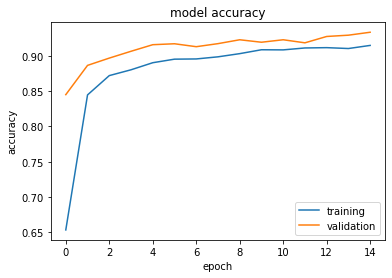


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
422/422 [==============================] - 2s 3ms/step - loss: 2.0337 - accuracy: 0.3464 - val_loss: 1.0670 - val_accuracy: 0.6735
Epoch 2/15
422/422 [==============================] - 1s 2ms/step - loss: 0.9695 - accuracy: 0.7176 - val

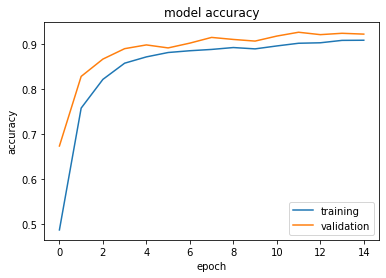


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_12 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
422/422 [==============================] - 2s 3ms/step - loss: 2.2026 - accuracy: 0.2310 - val_loss: 1.3

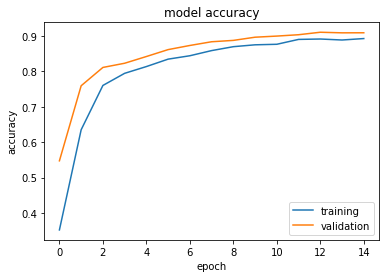

In [8]:
for layers in range(1, 5):
    model = create_dense([32] * layers)
    evaluate(model)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
422/422 [==============================] - 1s 3ms/step - loss: 1.4536 - accuracy: 0.5771 - val_loss: 0.5296 - val_accuracy: 0.8855
Epoch 2/15
422/422 [==============================] - 1s 2ms/step - loss: 0.5336 - accuracy: 0.8674 - val_loss: 0.3779 - val_accuracy: 0.9050
Epoch 3/15
422/422 [==============================] - 1s 2ms/step - loss: 0.4290 - accuracy: 0.8861 - val_loss: 0.3406 - val_accuracy: 0.9128
Epoch 4/15
422/422 [==============================] - 1s 2ms/step - loss: 0.3855 - acc

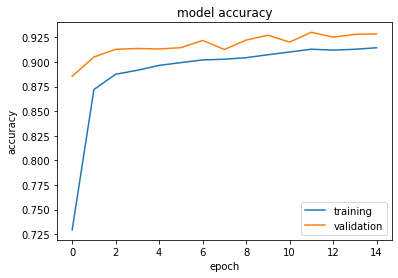


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
422/422 [==============================] - 2s 3ms/step - loss: 1.2286 - accuracy: 0.6470 - val_loss: 0.3793 - val_accuracy: 0.9072
Epoch 2/15
422/422 [==============================] - 1s 2ms/step - loss: 0.4041 - accuracy: 0.8916 - val_loss: 0.3036 - val_accuracy: 0.9178
Epoch 3/15
422/422 [==============================] - 1s 2ms/step - loss: 0.3392 - accuracy: 0.9031 - val_loss: 0.2677 - val_accuracy: 0.9268
Epoch 4/15
422/422 [==============================] - 1s 2ms/step - loss: 0.3035 - ac

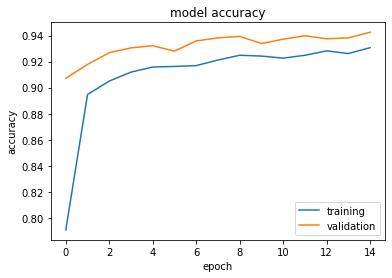


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
422/422 [==============================] - 2s 3ms/step - loss: 1.0475 - accuracy: 0.7029 - val_loss: 0.3268 - val_accuracy: 0.9192
Epoch 2/15
422/422 [==============================] - 1s 3ms/step - loss: 0.3536 - accuracy: 0.9016 - val_loss: 0.2565 - val_accuracy: 0.9290
Epoch 3/15
422/422 [==============================] - 1s 3ms/step - loss: 0.3034 - accuracy: 0.9171 - val_loss: 0.2349 - val_accuracy: 0.9345
Epoch 4/15
422/422 [==============================] - 1s 3ms/step - loss: 0.2701 - 

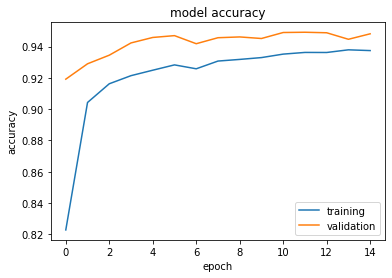


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_23 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
422/422 [==============================] - 2s 4ms/step - loss: 0.8457 - accuracy: 0.7646 - val_loss: 0.2661 - val_accuracy: 0.9312
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 0.3091 - accuracy: 0.9126 - val_loss: 0.2160 - val_accuracy: 0.9445
Epoch 3/15
422/422 [==============================] - 2s 4ms/step - loss: 0.2626 - accuracy: 0.9263 - val_loss: 0.2076 - val_accuracy: 0.9425
Epoch 4/15
422/422 [==============================] - 2s 4ms/step - loss: 0.2454 - 

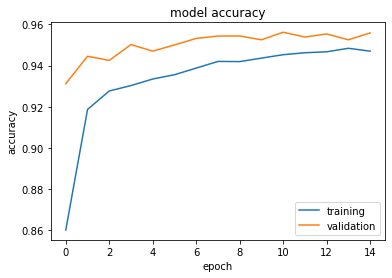


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_25 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
422/422 [==============================] - 3s 6ms/step - loss: 0.6604 - accuracy: 0.8097 - val_loss: 0.2320 - val_accuracy: 0.9400
Epoch 2/15
422/422 [==============================] - 2s 5ms/step - loss: 0.2688 - accuracy: 0.9246 - val_loss: 0.2042 - val_accuracy: 0.9475
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: 0.2376 - accuracy: 0.9329 - val_loss: 0.1911 - val_accuracy: 0.9457
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: 0.2175 - 

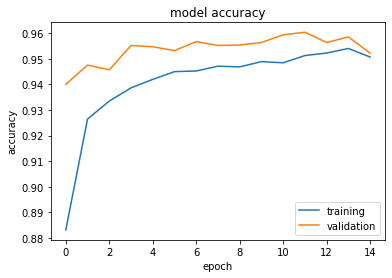


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_27 (Dense)             (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
422/422 [==============================] - 4s 9ms/step - loss: 0.5801 - accuracy: 0.8363 - val_loss: 0.2142 - val_accuracy: 0.9415
Epoch 2/15
422/422 [==============================] - 4s 9ms/step - loss: 0.2430 - accuracy: 0.9330 - val_loss: 0.1875 - val_accuracy: 0.9513
Epoch 3/15
422/422 [==============================] - 4s 9ms/step - loss: 0.2192 - accuracy: 0.9385 - val_loss: 0.1702 - val_accuracy: 0.9522
Epoch 4/15
422/422 [==============================] - 4s 9ms/step - loss: 0.2014 -

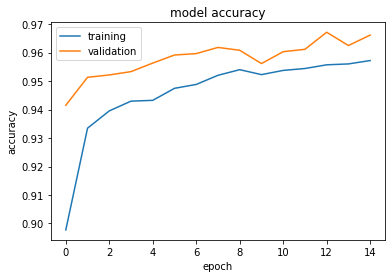


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
dense_29 (Dense)             (None, 10)                20490     
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
422/422 [==============================] - 7s 16ms/step - loss: 0.4499 - accuracy: 0.8665 - val_loss: 0.1847 - val_accuracy: 0.9527
Epoch 2/15
422/422 [==============================] - 6s 15ms/step - loss: 0.2240 - accuracy: 0.9360 - val_loss: 0.1572 - val_accuracy: 0.9600
Epoch 3/15
422/422 [==============================] - 7s 16ms/step - loss: 0.2022 - accuracy: 0.9423 - val_loss: 0.1768 - val_accuracy: 0.9513
Epoch 4/15
422/422 [==============================] - 6s 15ms/step - loss: 

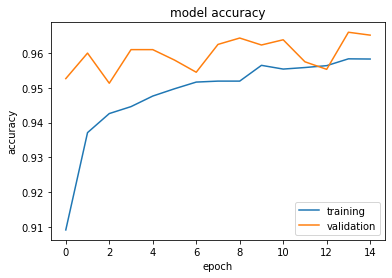

In [9]:
for nodes in [32, 64, 128, 256, 512, 1024, 2048]:
    model = create_dense([nodes])
    evaluate(model)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_31 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_32 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_33 (Dense)             (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
422/422 [==============================] - 2s 3ms/step - loss: 2.0939 - accuracy: 0.3419 - val_loss: 1.0702 - val_accuracy: 0.7448
Epoch 2/15
422/422 [==============================] - 1s 2ms/step - loss: 0.9886 - accuracy: 0.7466 - val

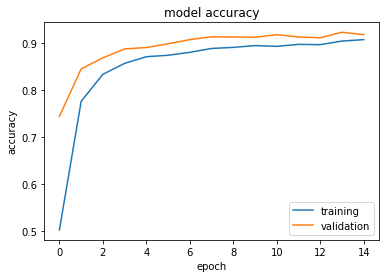


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_35 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_36 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_37 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_38 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
422/422 [==============================] - 2s 3ms/step - loss: 2.1638 - accuracy: 0.2033 - val_loss: 1.

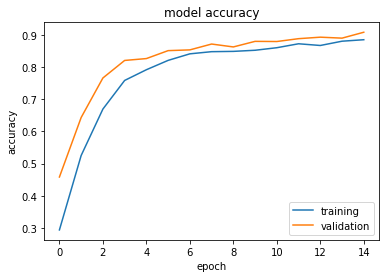


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_40 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_41 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_42 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_43 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_44 (Dense)             (None, 10)                330       
Total params: 29,674
Trainable params: 29,674
Non-trainable params: 0
________________________________________________

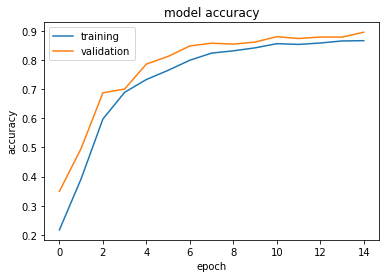


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_46 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_47 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_48 (Dense)             (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
422/422 [==============================] - 2s 4ms/step - loss: 1.4000 - accuracy: 0.5965 - val_loss: 0.3314 - val_accuracy: 0.9057
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 0.3696 - accuracy: 0.8892 - 

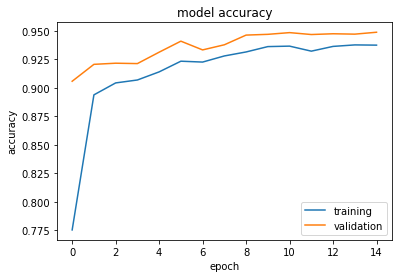


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_50 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_51 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_52 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_53 (Dense)             (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
422/422 [==============================] - 3s 5ms/step - loss: 1.5247 - accuracy: 0.5164 - val_loss: 

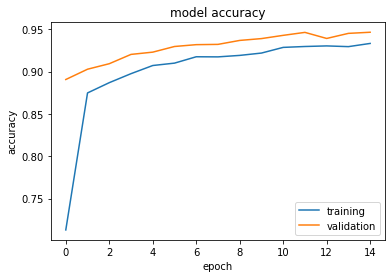


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_55 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_56 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_57 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_58 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_59 (Dense)             (None, 10)                1290      
Total params: 167,818
Trainable params: 167,818
Non-trainable params: 0
______________________________________________

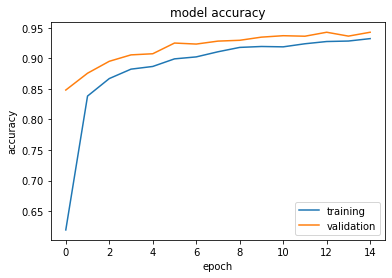


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_61 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_62 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_63 (Dense)             (None, 10)                5130      
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
422/422 [==============================] - 5s 12ms/step - loss: 0.8494 - accuracy: 0.7381 - val_loss: 0.2501 - val_accuracy: 0.9215
Epoch 2/15
422/422 [==============================] - 5s 12ms/step - loss: 0.2740 - accuracy: 0.9163 

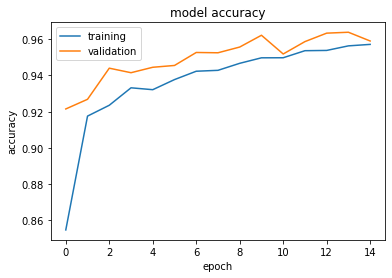


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_65 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_66 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_67 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_68 (Dense)             (None, 10)                5130      
Total params: 1,195,018
Trainable params: 1,195,018
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
422/422 [==============================] - 7s 15ms/step - loss: 0.9924 - accuracy: 0.6712 - val_l

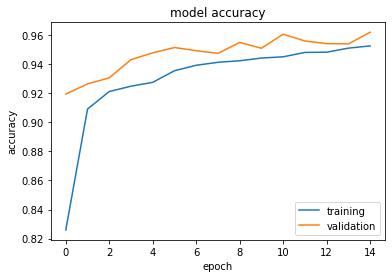


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_70 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_71 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_72 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_73 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_74 (Dense)             (None, 10)                5130      
Total params: 1,457,674
Trainable params: 1,457,674
Non-trainable params: 0
__________________________________________

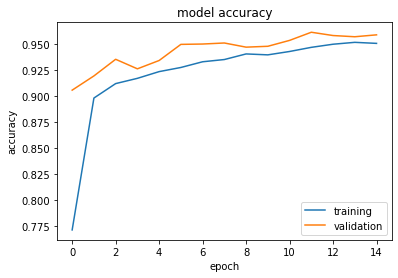

In [ ]:
for nodes_per_layer in [32, 128, 512]:
    for layers in [3, 4, 5]:
        model = create_dense([nodes_per_layer] * layers)
        evaluate(model, epochs=10*layers)